<center><h1> Analiza internacionalnih utakmica u posljednih 30ak godina </h1></center>
<center><h3> </h3></center> 
<center><h3> </h3></center> 
<center><h3> Tonino Kaštelan, Matej Kožica, Nikola Tafra</h3></center>
<center><h3> </h3></center> 
<center><h4> Akademska godina 2022./2023.</h4></center>

## Opis projekta i podaci

Za potrebe ovog projekta iskorišteni su podaci dostupni na sljedećem linku: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022.
U sklopu navedenog skupa podataka moguće je pronaći sve informacije o internacionalnim utakmicama odigranih od 08.08.1993. godine. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `date`           | Datum kada je utakmica odigrana |
| `home_team`            | Domaća momčad. |
| `away_team`      | Gostujuća momčad. |
| `home_team_continent`      | Kontinent s kojeg dolazi domaća momčad. |
| `away_team_continent`            | Kontinent s kojeg dolazi gostujuća momčad |
| `home_team_fifa_rank`     | FIFA ranking domaće momčadi. |
| `away_team_fifa_rank`            | FIFA ranking gostujuće momčadi. |
| `home_team_total_fifa_points`       | Zbroj FIFA bodova svih igrača domaće momčadi.  |
| `away_team_total_fifa_points` | Zbroj FIFA bodova svih igrača gostujuće momčadi. |
| `home_team_score` | Broj golova domaće momčadi. |
| `away_team_score` | Broj golova gostujuće momčadi |
| `tournament` | Natjecanje u sklopu kojeg je utakmica odigrana. |
| `city` | Grad u kojem je utakmica odigrana. |
| `country` | Država u kojoj je utakmica odigrana. |
| `neutral_location` | NEMAM POJMA ŠTA JE OVO. |
| `shoot_out` | Je li utakmica završila izvođenjem jedanaesteraca? |
| `home_team_result` | Ishod utakmice za domaću momčad. |
| `home_team_goalkeeper_score` | FIFA ranking golmana domaće momčadi. |
| `away_team_goalkeeper_score` | FIFA ranking golmana gostujuće momčadi. |
| `home_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača domaće momčadi. |
| `home_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača domaće momčadi. |
| `home_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača domaće momčadi. |
| `away_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača gostujuće momčadi. |
| `away_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača gostujuće momčadi. |
| `away_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača gostujuće momčadi. |

In [1]:
import pandas as pd
import seaborn as sns

matches = pd.read_csv('./international_matches.csv')

**Gradovi u kojima je odigrano najviše internacionalnih utakmica**

**Gradovi u kojima je odigrano najmanje internacionalnih utakmica**

**Države u kojima je odigrano najviše internacionalnih utakmica**

**Države u kojima je odigrano najviše internacionalnih utakmica**

**Države koje u prosjeku imaju najbolji vezni red po FIFA ocjenama**

<AxesSubplot: xlabel='mean_midfield_score', ylabel='country'>

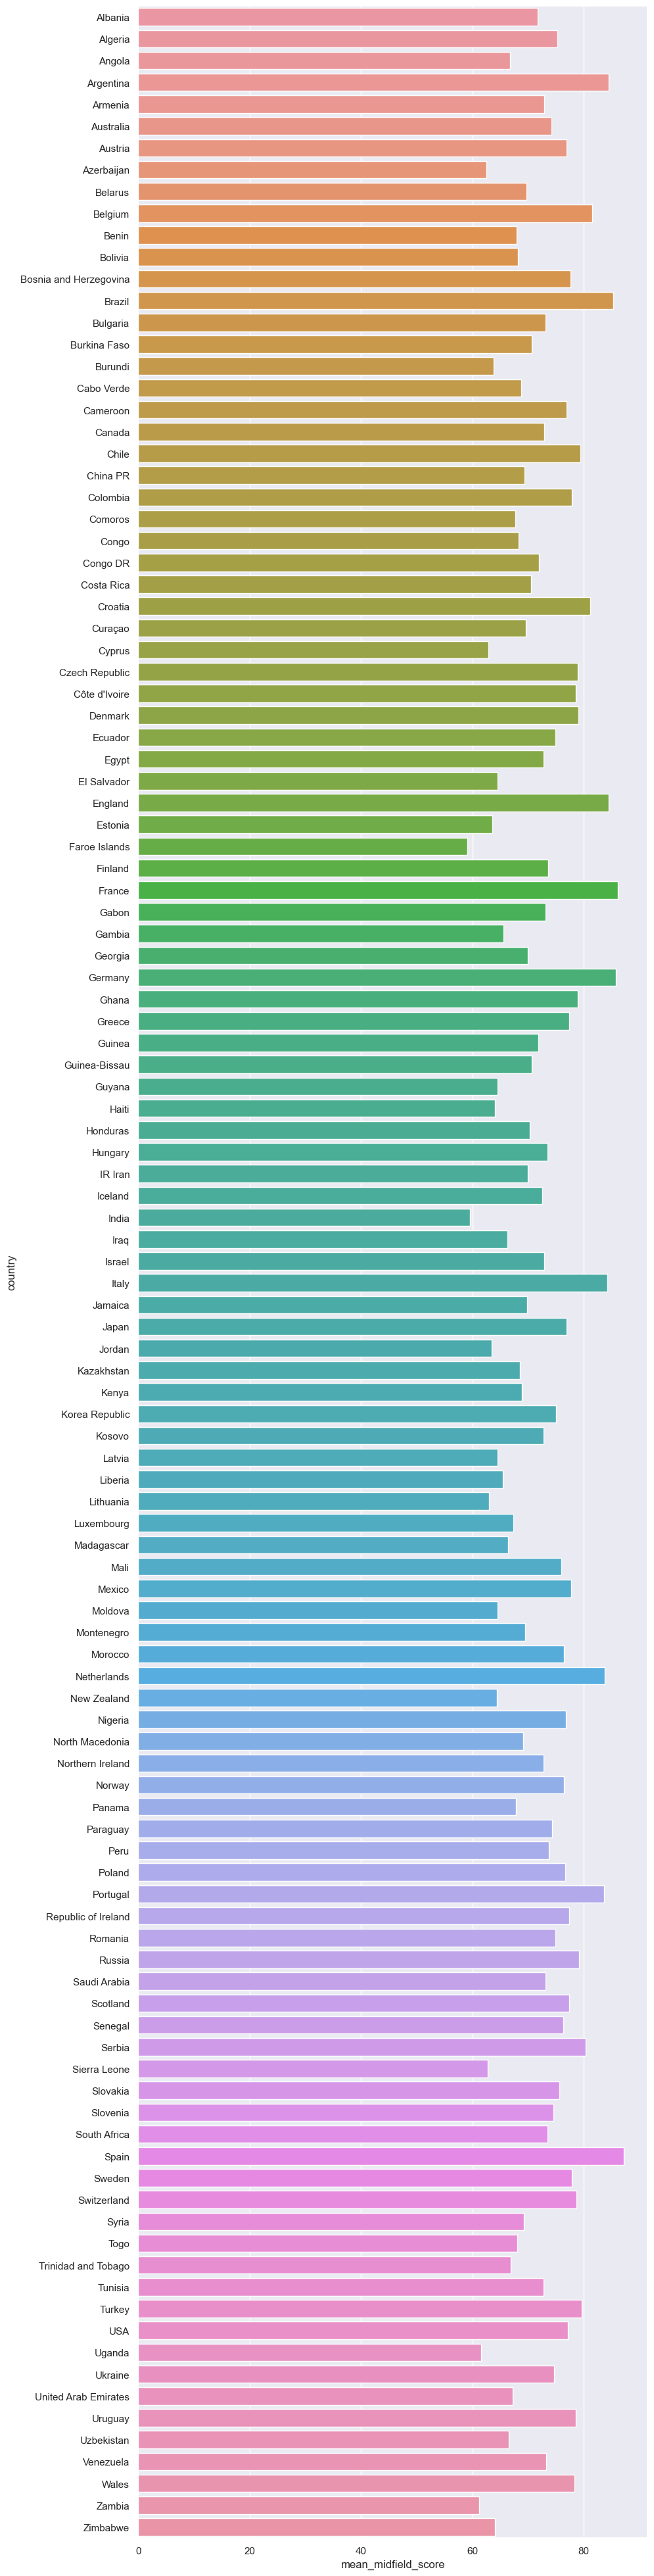

In [20]:
home_team_midfield_mean_score = pd.DataFrame(matches[['home_team', 'home_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
away_team_midfield_mean_score = pd.DataFrame(matches[['away_team', 'away_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
countries_midfield_mean_score = pd.concat([home_team_midfield_mean_score, away_team_midfield_mean_score])
countries_midfield_mean_score = countries_midfield_mean_score.groupby(countries_midfield_mean_score['country'], as_index=False).aggregate('mean')
sns.set(rc={'figure.figsize':(10,50)})
sns.barplot(data=countries_midfield_mean_score, y=countries_midfield_mean_score['country'], x=countries_midfield_mean_score['mean_midfield_score'], orient='h')

**Države koje u prosjeku imaju najbolju obranu po FIFA ocjenama**

**Države koje u prosjeku imaju najbolji napad po FIFA ocjenama**

**Utakmice u kojima je zabijeno najviše golova**

**Države s najviše zabijenih golova**

**Države s najmanje zabijenih golova**

**Države koje su u jednoj utakmici zabile najviše golova**

**Države koje su u jednoj utakmici zabile najviše golova, a izgubile**